### Setup

In [1]:
import sys
sys.path.insert(1, '../utils')

import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds

from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.shape

(299, 13)

## 1.1. Data Dimensionality

---

### Number of records/variables

---

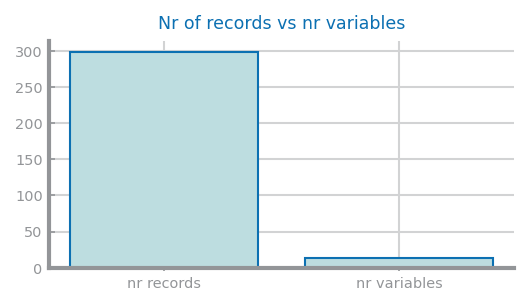

In [2]:
plt.figure(figsize=(4,2))
values = {'nr records': data.shape[0], 'nr variables': data.shape[1]}
ds.bar_chart(values.keys(), values.values(), title='Nr of records vs nr variables')

### Data types

---

In [3]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [4]:
data = data.astype({
    'anaemia': bool, 
    'diabetes': bool, 
    'high_blood_pressure': bool, 
    'sex': bool,
    'smoking': bool,
    'DEATH_EVENT': bool
})
data.dtypes

age                         float64
anaemia                        bool
creatinine_phosphokinase      int64
diabetes                       bool
ejection_fraction             int64
high_blood_pressure            bool
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                            bool
smoking                        bool
time                          int64
DEATH_EVENT                    bool
dtype: object

### Missing values

---

dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

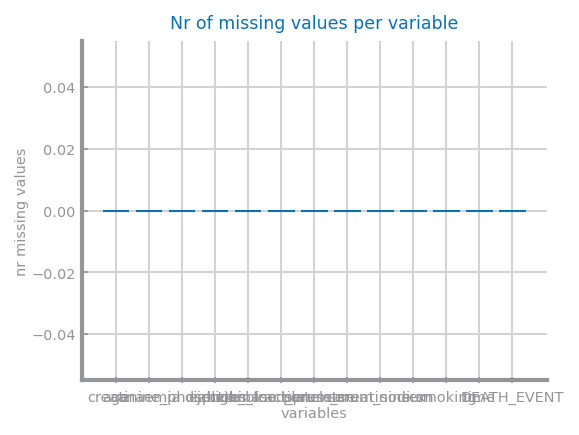

In [5]:
plt.figure()
mv = {}
for var in data:
    mv[var] = data[var].isna().sum()
ds.bar_chart(mv.keys(), mv.values(), title='Nr of missing values per variable',
               xlabel='variables', ylabel='nr missing values')
mv.values()

### Summary


***How many variables are there in the dataset?***

***13*** variables

***And how many records?***

***299*** records

***What is the ratio between the number of records and variables?***

There is a ratio of ***23*** records per variable.

***What are the types for each variable?***

Variable types:

| variable                      | type    |
|:------------------------------|:--------|
| age                           | float64 |
| anaemia                       | bool    |
| creatinine_phosphokinase      | int64   |
| diabetes                      | bool    |
| ejection_fraction             | int64   |
| high_blood_pressure           | bool    |
| platelets                     | float64 |
| serum_creatinine              | float64 |
| serum_sodium                  | int64   |
| sex                           | bool    |
| smoking                       | bool    |
| time                          | int64   |
| DEATH_EVENT                   | bool    |

***How many missing values are there per variable?***

There are no missing values in the dataset

    de
    dsfs
    fdfd

## 1.2. Data Distribution

---

### Numeric Variables
The simplest way to describe each numeric variable is through its five-number summary, inspecting its range through the identification of its minimum and maximum values, along with other estimators, like the mean, standard deviation and other different percentiles.

In [6]:
data.describe().append(data.select_dtypes(include='number').mode()[:1]).rename({0: 'mode'}, axis='index')

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000
mode,60.000000,582.000000,35.000000,263358.030000,1.00000,136.000000,187.000000


The five-numbers summary alone, give all the information required, but it's not easy to interpret. A better way to understand the impact of such values is through the analysis of boxplots for each variable.

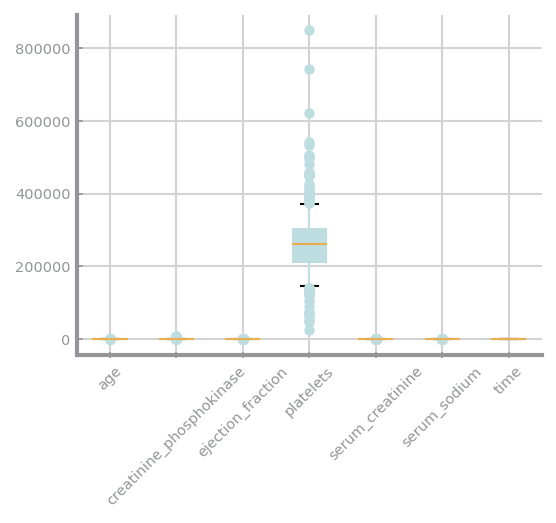

In [7]:
data.boxplot(column=data.select_dtypes(include='number').columns.tolist(), rot=45)
plt.show()

Due to the different scales it is difficult to analyze each one in particular ploting all numeric variables in the same chart. So we will plot singular boxplots for each variable

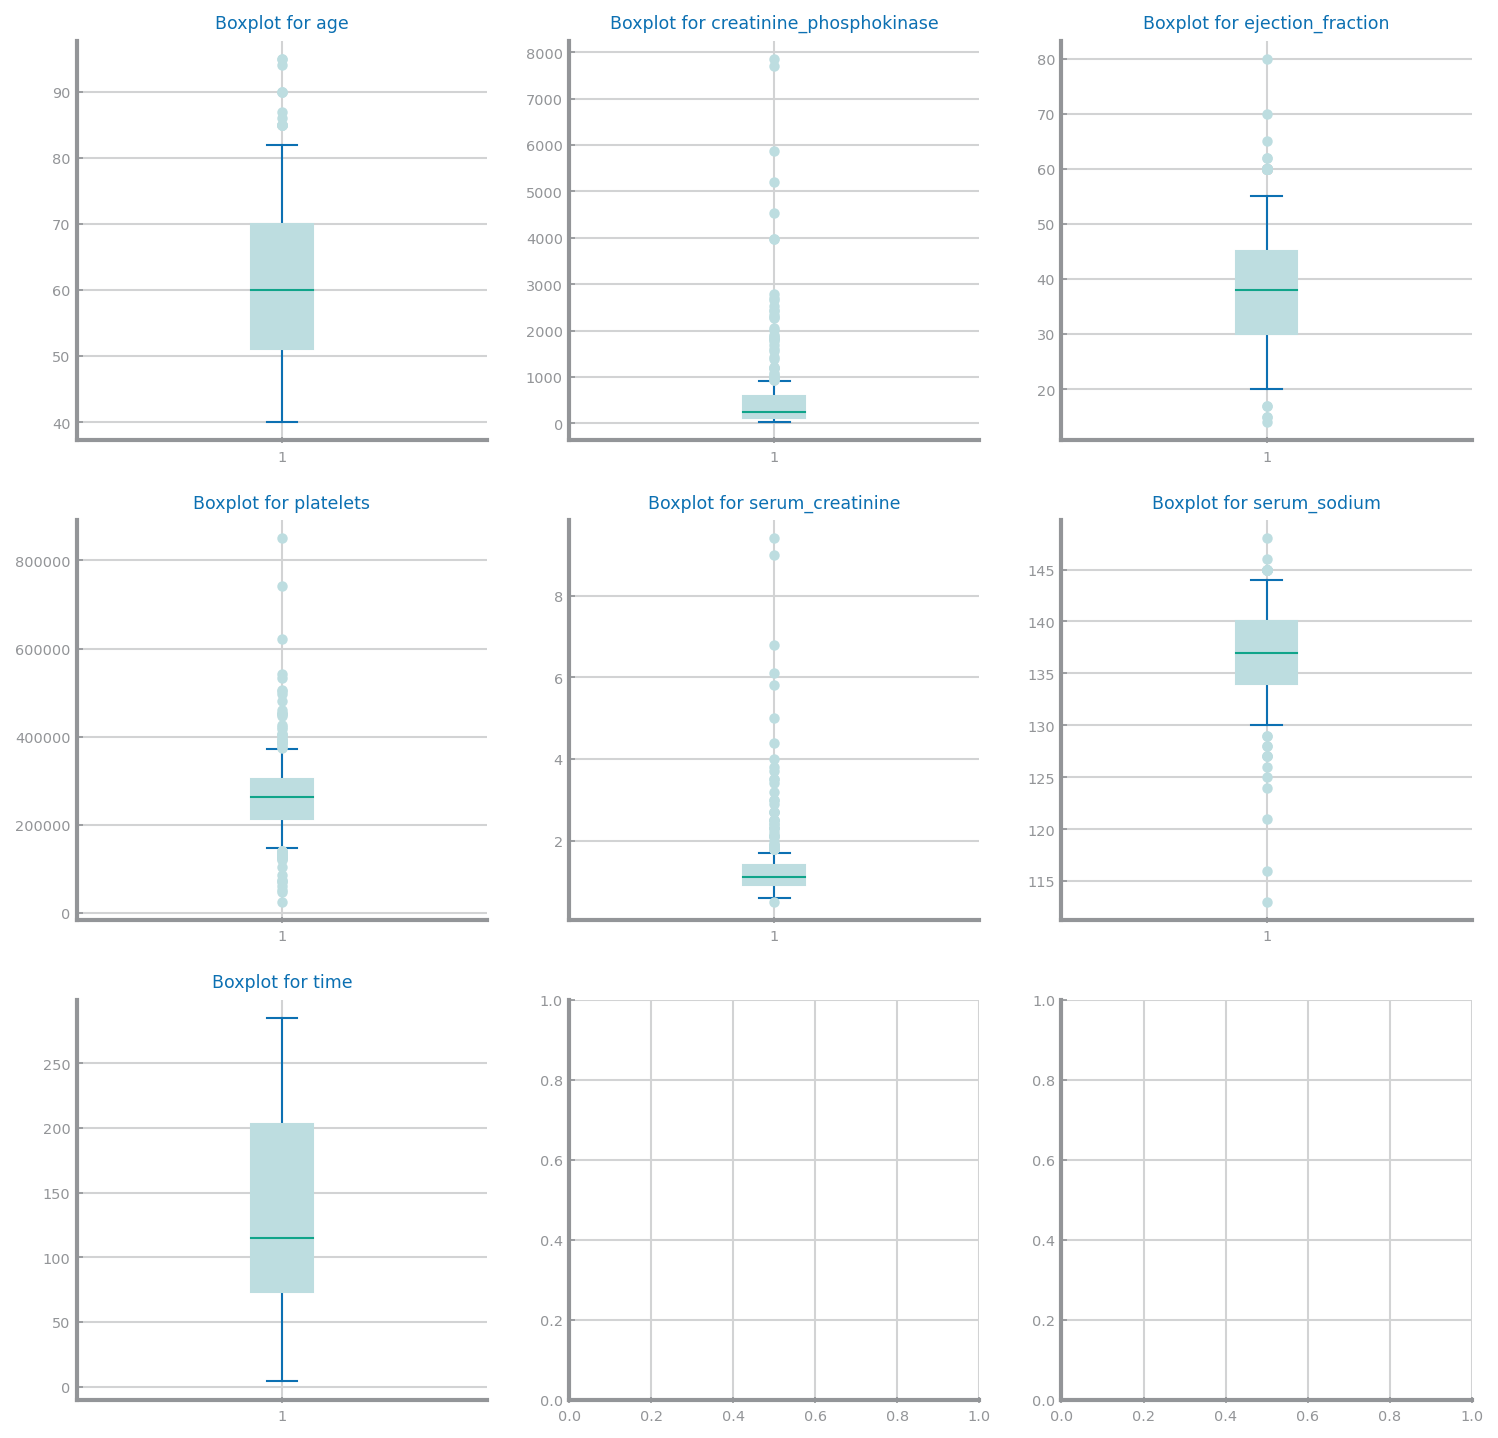

In [8]:
numeric_vars = data.select_dtypes(include='number').columns
rows, cols = ds.choose_grid(len(numeric_vars))
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0
for n in range(len(numeric_vars)):
    axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
    axs[i, j].boxplot(data[numeric_vars[n]].values)
    
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

It's clear that our variables have different ranges, scales, that there are several outliers, etc, but we are not able to know anything else about the variables distribution. In order to see their distribution the best option is to plot the histogram for each numeric variable.

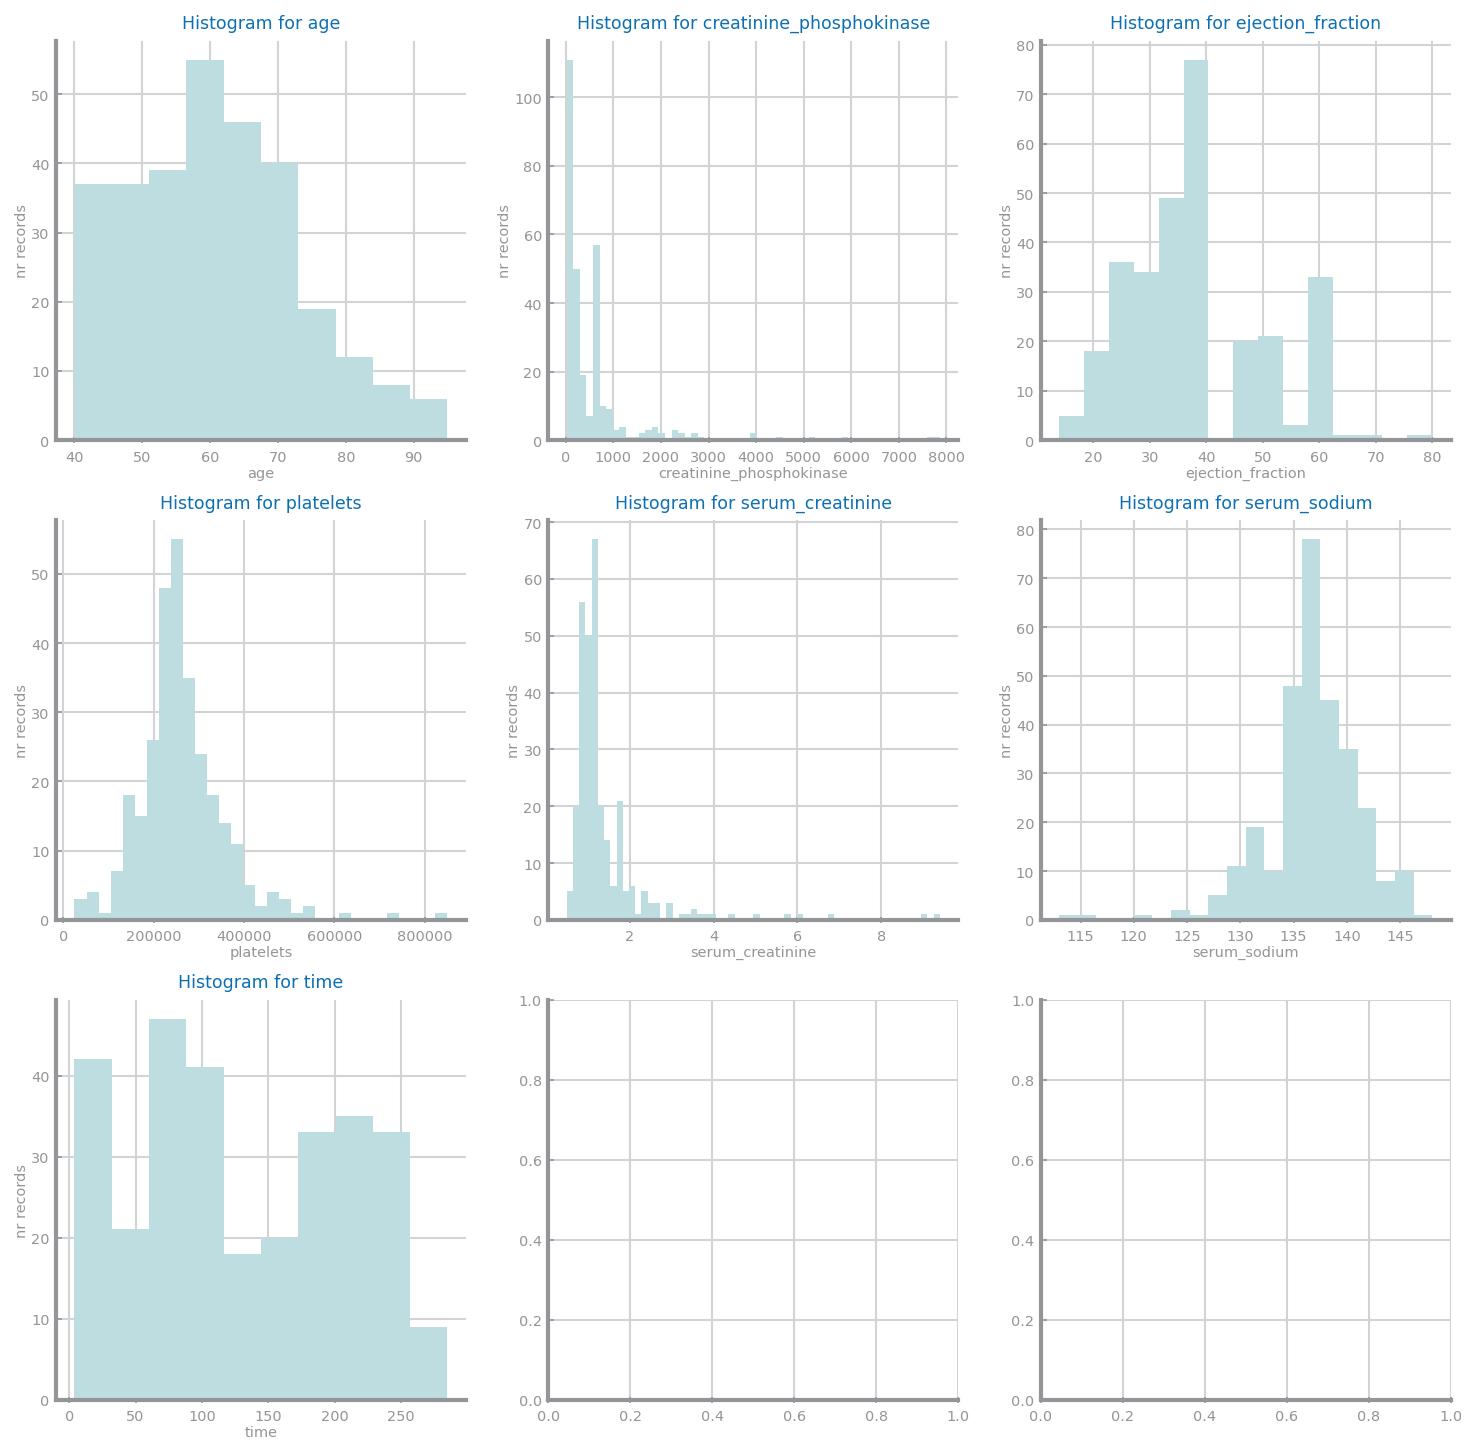

In [9]:
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0
for n in range(len(numeric_vars)):
    axs[i, j].set_title('Histogram for %s'%numeric_vars[n])
    axs[i, j].set_xlabel(numeric_vars[n])
    axs[i, j].set_ylabel("nr records")
    axs[i, j].hist(data[numeric_vars[n]].dropna().values, 'auto')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

Indeed histograms give us an insight about the distribution of each variable. Lets try to fit different known distributions to it.

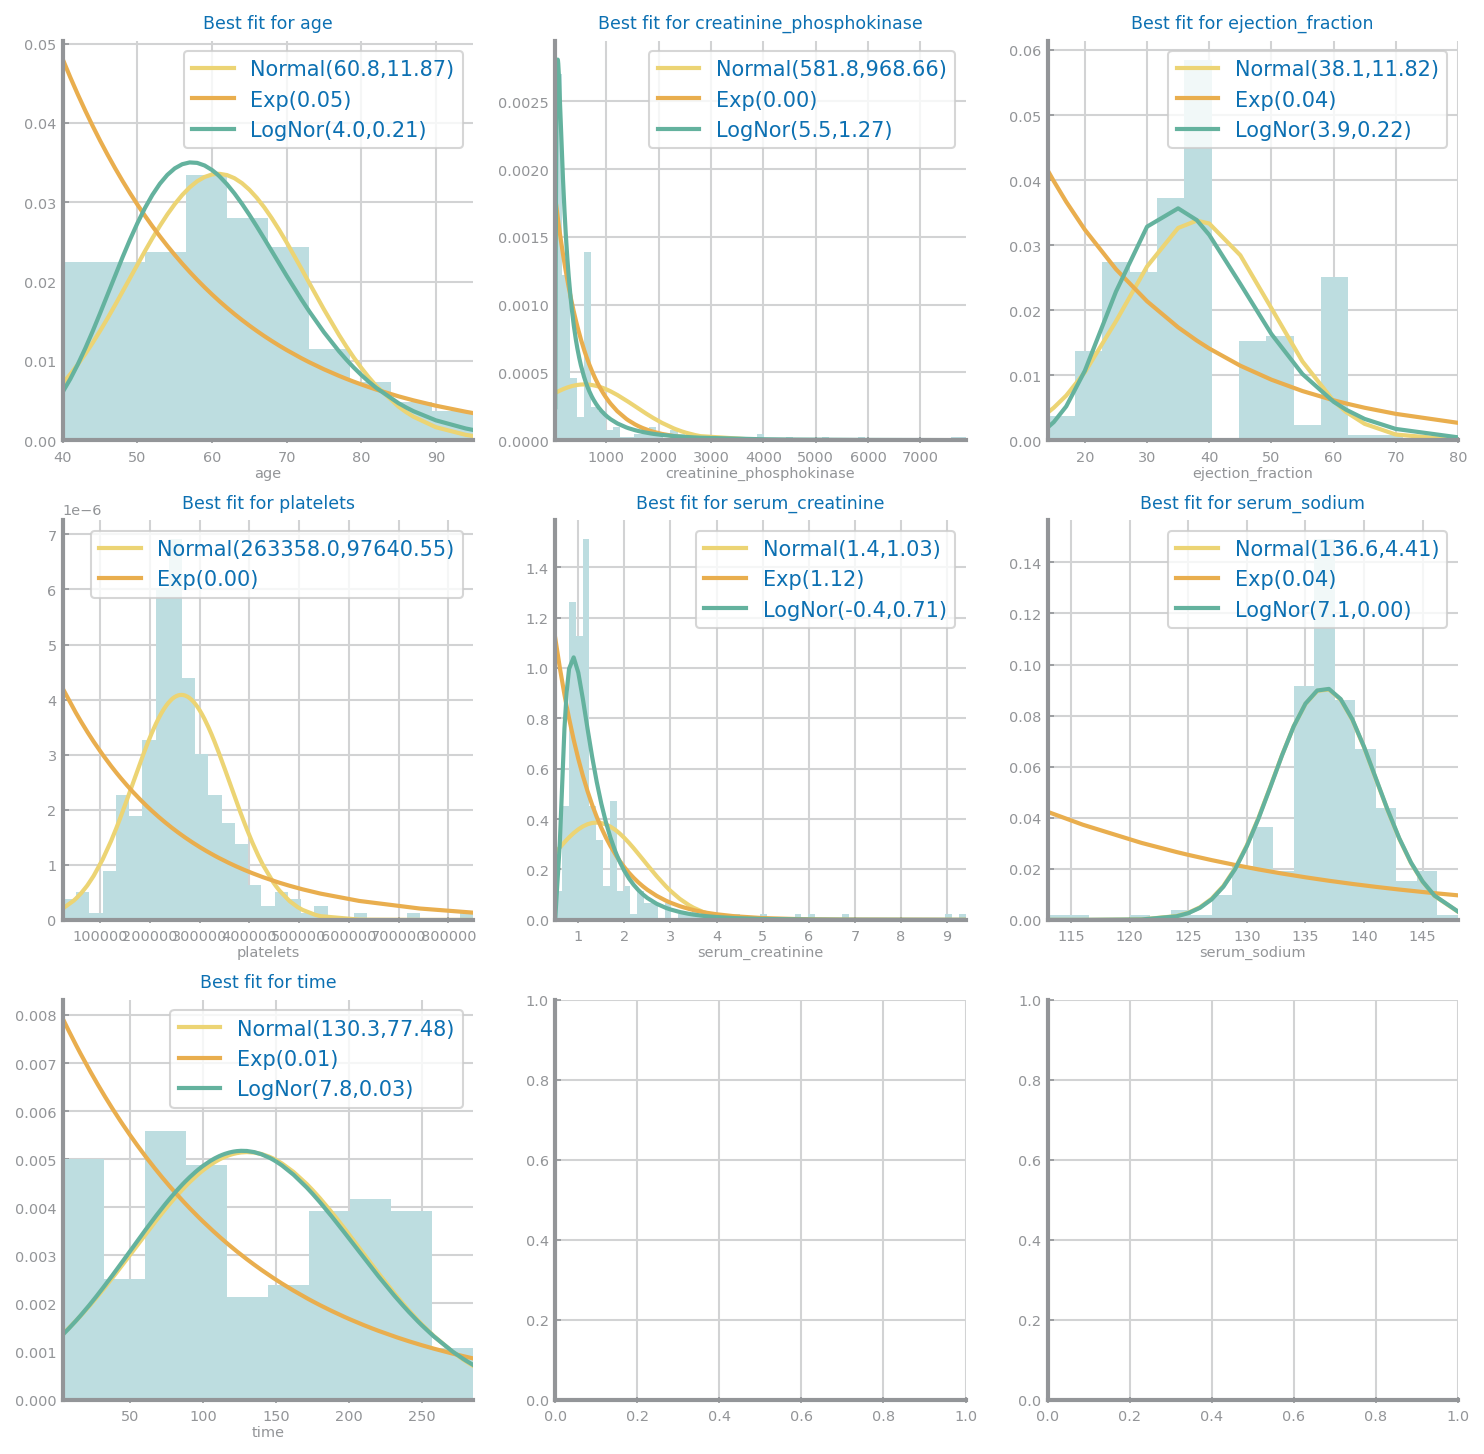

In [10]:
'''
import seaborn as sns
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0
for n in range(len(numeric_vars)):
    axs[i, j].set_title('Histogram with trend for %s'%numeric_vars[n])
    sns.distplot(data[numeric_vars[n]].dropna().values, norm_hist=True, ax=axs[i, j], axlabel=numeric_vars[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()
'''
import scipy.stats as _stats
import numpy as np
def compute_known_distributions(x_values: list, useLogNorm: bool = True) -> dict:
    distributions = dict()
    # Gaussian
    mean, sigma = _stats.norm.fit(x_values)
    distributions['Normal(%.1f,%.2f)'%(mean,sigma)] = _stats.norm.pdf(x_values, mean, sigma)
    # Exponential
    loc, scale = _stats.expon.fit(x_values)
    distributions['Exp(%.2f)'%(1/scale)] = _stats.expon.pdf(x_values, loc, scale)
    # LogNorm
    if useLogNorm:
        sigma, loc, scale = _stats.lognorm.fit(x_values)
        distributions['LogNor(%.1f,%.2f)'%(np.log(scale),sigma)] = _stats.lognorm.pdf(x_values, sigma, loc, scale)
    return distributions

def histogram_with_distributions(ax: plt.Axes, series: pd.Series, var: str):
    values = series.sort_values().values
    ax.hist(values, 'auto', density=True)
    distributions = compute_known_distributions(values, var != 'platelets')
    ds.multiple_line_chart(values, distributions, ax=ax, title='Best fit for %s'%var, xlabel=var, ylabel='')

fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0
for n in range(len(numeric_vars)):
    histogram_with_distributions(axs[i, j], data[numeric_vars[n]].dropna(), numeric_vars[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
    
plt.show()

### Symbolic Variables
Boxplots are not applicable to non-numeric variables. Lets identify their values and most frequent values (modes).

In [11]:
data.describe(include='bool').rename({'top': 'mode'}, axis='index')

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
count,299,299,299,299,299,299
unique,2,2,2,2,2,2
mode,False,False,False,True,False,False
freq,170,174,194,194,203,203


In order to explore these 6 variables, in terms of their distribution we will use histograms.

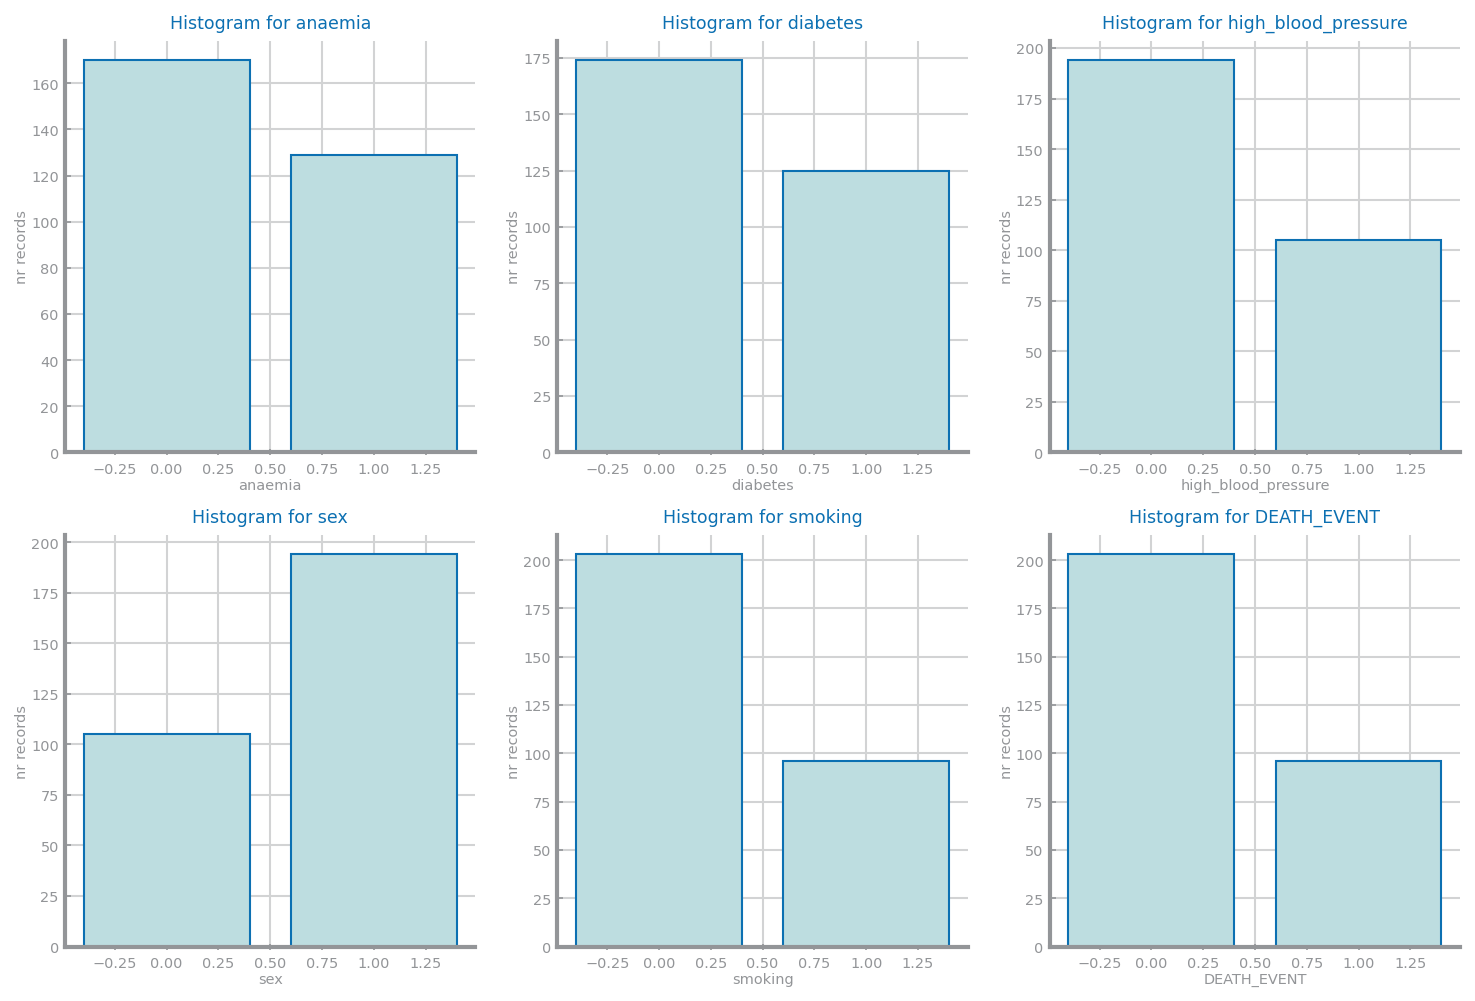

In [12]:
symbolic_vars = data.select_dtypes(include='bool').columns

rows, cols = ds.choose_grid(len(symbolic_vars))
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT), squeeze=False)
i, j = 0, 0
for n in range(len(symbolic_vars)):
    counts = data[symbolic_vars[n]].value_counts()
    ds.bar_chart(counts.index.to_list(), counts.values, ax=axs[i, j], title='Histogram for %s'%symbolic_vars[n],
                 xlabel=symbolic_vars[n], ylabel='nr records')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

### Summary

***What is the type and range for each variable?***

- **age**:
    - type: Numeric
    - range[min, max]: [40, 95]
    
    
- **creatinine_phosphokinase**:
    - type: Numeric
    - range[min, max]: [23, 7861]
    
    
- **ejection_fraction**:
    - type: Numeric
    - range[min, max]: [14, 80]
    
    
- **platelets**:
    - type: Numeric
    - range[min, max]: [212500, 850000]
    
    
- **serum_creatinine**:
    - type: Numeric
    - range[min, max]: [0.5, 9.4]
    
    
- **serum_sodium**:
    - type: Numeric
    - range[min, max]: [113, 148]
    
    
- **time**:
    - type: Numeric
    - range[min, max]: [4, 285]
    
    
- **anaemia**:
    - type: Symbolic
    - range: [False, True]
    
    
- **diabetes**:
    - type: Symbolic
    - range: [False, True]
    
    
- **high_blood_pressure**:
    - type: Symbolic
    - range: [False, True]
    
    
- **sex**:
    - type: Symbolic
    - range: [False, True]
    
    
- **smoking**:
    - type: Symbolic
    - range: [False, True]
    
    
- **DEATH_EVENT**:
    - type: Symbolic
    - range: [False, True]
        
        
***And its mean value, mode, standard deviation, and quartiles?***

- **age**:
    - mean: 60.833893
    - mode: 60
    - std: 11.894809
    - Q1: 51
    - Q2: 60
    - Q3: 70
    
    
- **creatinine_phosphokinase**:
    - mean: 581.839465
    - mode: 582
    - std: 970.287881
    - Q1: 116.5
    - Q2: 250
    - Q3: 582
    
    
- **ejection_fraction**:
    - mean: 38.083612
    - mode: 35
    - std: 11.834841
    - Q1: 30
    - Q2: 38
    - Q3: 45
    
    
- **platelets**:
    - mean: 263358.029264
    - mode: 263358.030000 (In this case the mode doesn't give much information since the variable isn't discrete)
    - std: 97804.236869
    - Q1: 212500
    - Q2: 262000
    - Q3: 303500
    
    
- **serum_creatinine**:
    - mean: 1.39388
    - mode: 1 (In this case the mode doesn't give much information since the variable isn't discrete)
    - std: 1.03451
    - Q1: 0.9
    - Q2: 1.1
    - Q3: 1.4
    
    
- **serum_sodium**:
    - mean: 136.625418
    - mode: 136
    - std: 4.412477
    - Q1: 134
    - Q2: 137
    - Q3: 140
    
    
- **time**:
    - mean: 130.260870
    - mode: 187
    - std: 77.614208
    - Q1: 73
    - Q2: 115
    - Q3: 203
    
    
- **anaemia**:
    - mode: False
    
    
- **diabetes**:
    - mode: False
    
    
- **high_blood_pressure**:
    - mode: False
    
    
- **sex**:
    - mode: True
    
    
- **smoking**:
    - mode: False
    
    
- **DEATH_EVENT**:
    - mode: False

***Are there outliers?***

Yes, every variable has outliers, except for the time variable.

***Is it possible to identify each variable distribution?***

Yes, it is possible, except for time.
- **age**:
    - distribution: Normal
    
    
- **creatinine_phosphokinase**:
    - distribution: Exponential
    
    
- **ejection_fraction**:
    - distribution: LogNorm
    
    
- **platelets**:
    - distribution: Normal
    
    
- **serum_creatinine**:
    - distribution: LogNorm
    
    
- **serum_sodium**:
    - distribution: Normal or LogNorm since the curves are overlapping
    
    
- **time**:
    - distribution: We could not find any fitting distribution.
    
    
- **anaemia**:
    - distribution: Bernoulli since it's a binary variable
    
    
- **diabetes**:
    - distribution: Bernoulli since it's a binary variable
    
    
- **high_blood_pressure**:
    - distribution: Bernoulli since it's a binary variable
    
    
- **sex**:
    - distribution: Bernoulli since it's a binary variable
    
    
- **smoking**:
    - distribution: Bernoulli since it's a binary variable
    
    
- **DEATH_EVENT**:
    - distribution: Bernoulli since it's a binary variable

## 1.3. Data Granularity

---

### Atomic granularity

---

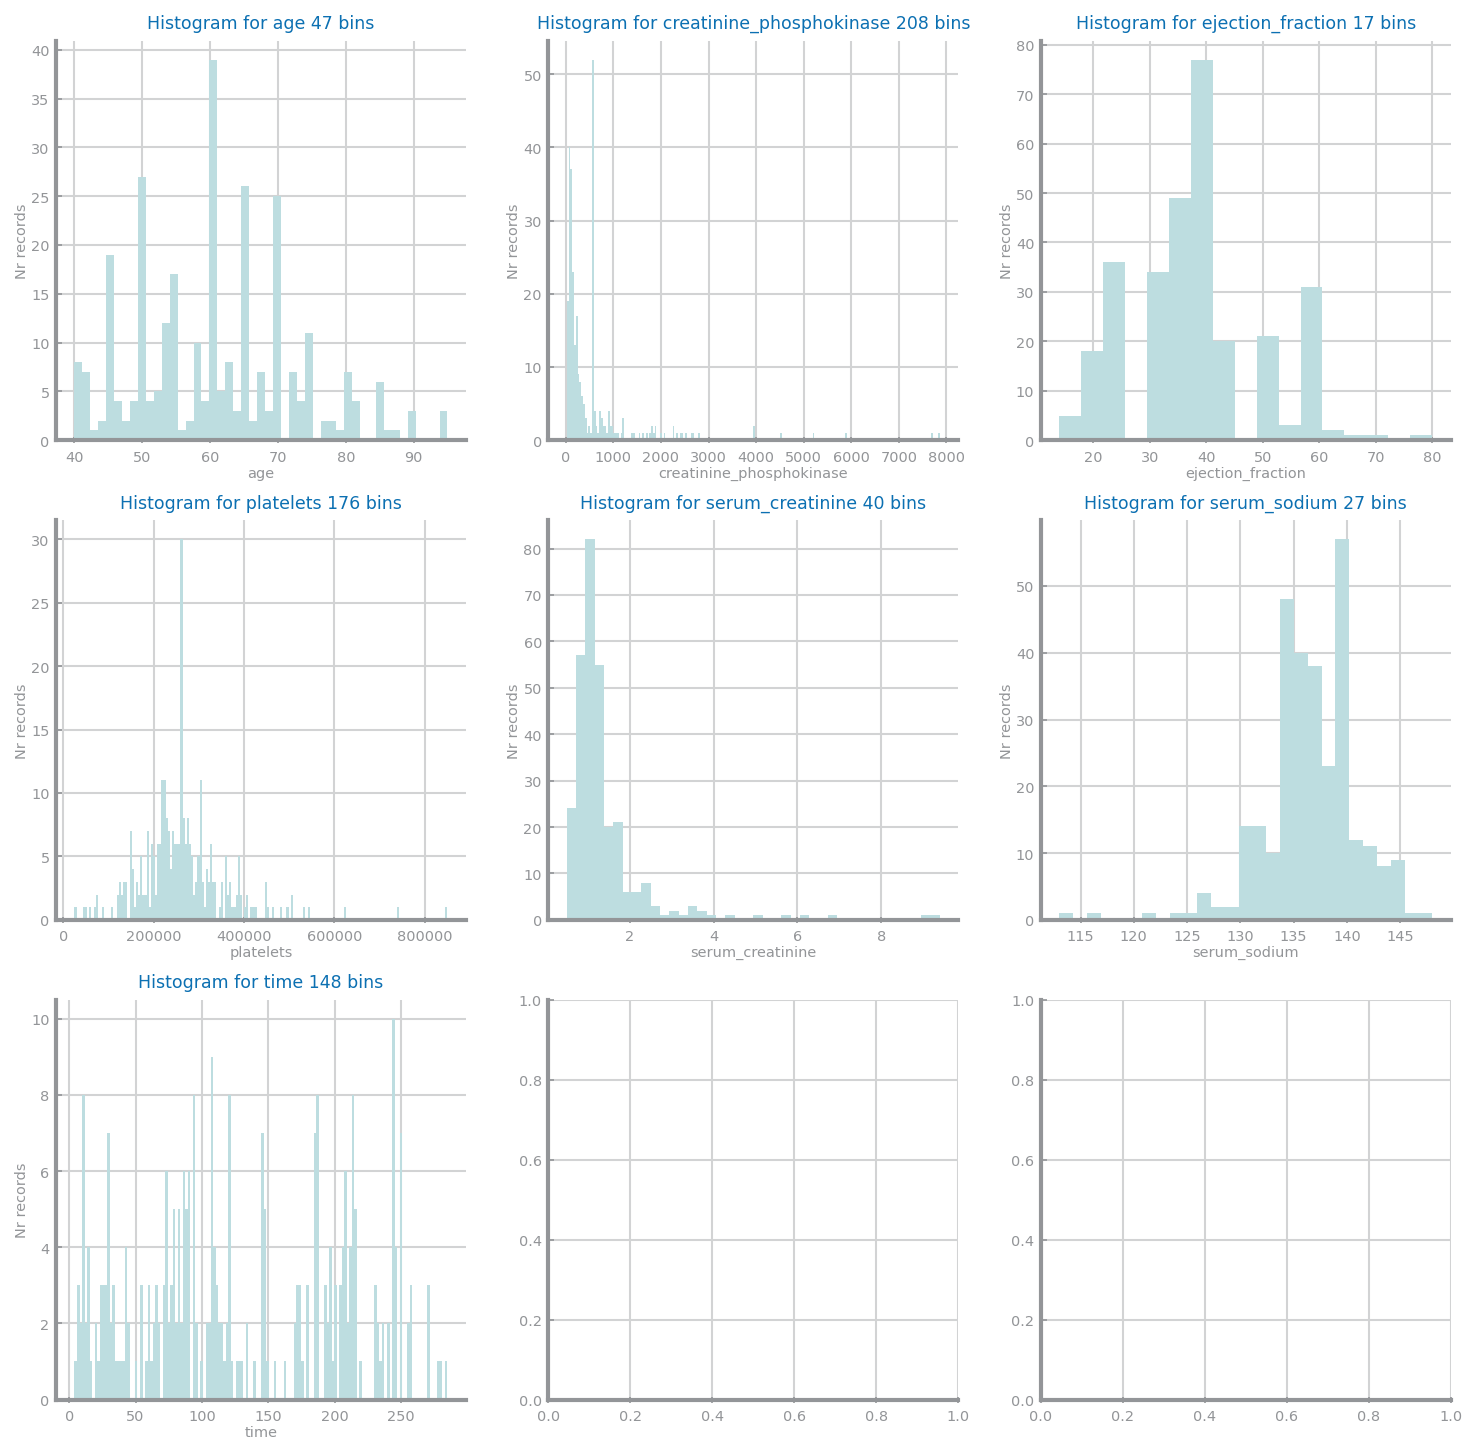

In [13]:
variables = data.select_dtypes(include='number').columns
rows, cols = ds.choose_grid(len(variables))
bins = data.select_dtypes(include='number').nunique()
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i,j = 0,0
for n in range(len(variables)):
    axs[i, j].set_title('Histogram for %s %d bins'%(variables[n], bins[n]))
    axs[i, j].set_xlabel(variables[n])
    axs[i, j].set_ylabel('Nr records')
    axs[i, j].hist(data[variables[n]].values, bins=bins[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

### Best granularity

---

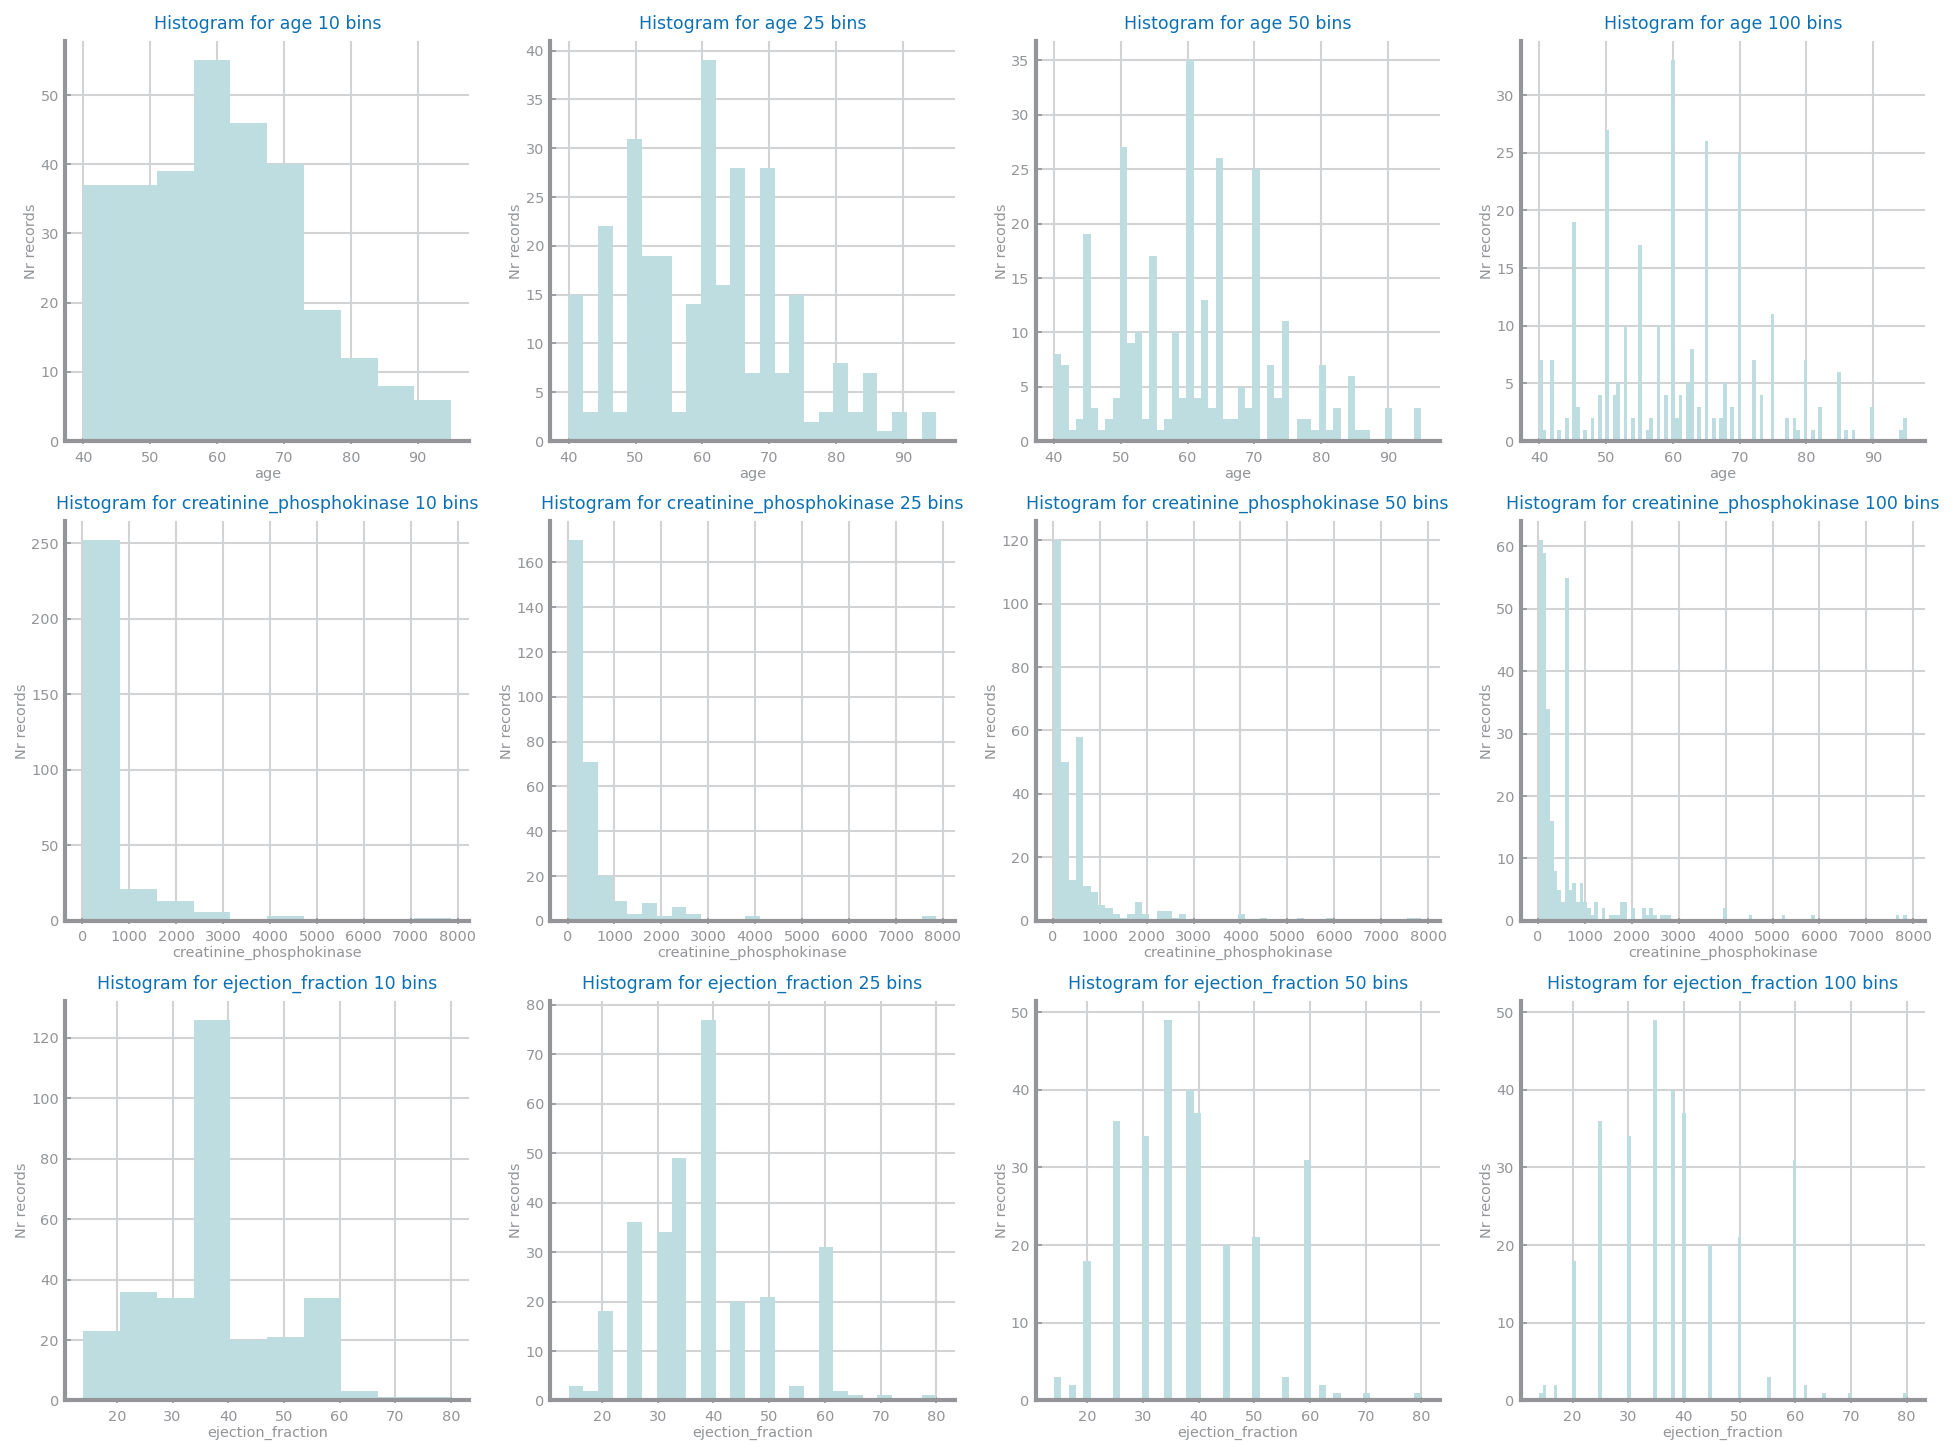

In [14]:
bins = (10, 25, 50, 100)
cols = len(bins)
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
for i in range(rows):
    for j in range(cols):
        axs[i, j].set_title('Histogram for %s %d bins'%(variables[i], bins[j]))
        axs[i, j].set_xlabel(variables[i])
        axs[i, j].set_ylabel('Nr records')
        axs[i, j].hist(data[variables[i]].values, bins=bins[j])
plt.show()

### Summary

---

***What is the most atomic granularity for each variable?***

It will be equal to the number of different values the each variable takes :
 


In [15]:
print(data.nunique())

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64


***What is the best granularity to discretize each numeric variable?***

The numeric variables we have are age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium and time. 

Based in the graphics above, we consider that the best granularity to discretize each numeric variable was: 


- For **age** and **serum sodium**, **50**.


- For **creatinine_phosphokinase**, **ejection_fraction**, **platelets** and **serum_creatinine**, **25**.


At those levels we could already start to predict the distribution (therefore values above those would be a waste of space) 


For **time**, we could not see a distribution for any of the number of bins we tried.

   
***Are there any hierarchy of concepts for symbolic variables, either from data or domain knowledge?***
    
**No**, there isn't any hierarchy of concepts for those symbolic variables.

## 1.4. Data Sparsity

---

### Sparsity

---

<Figure size 600x450 with 0 Axes>

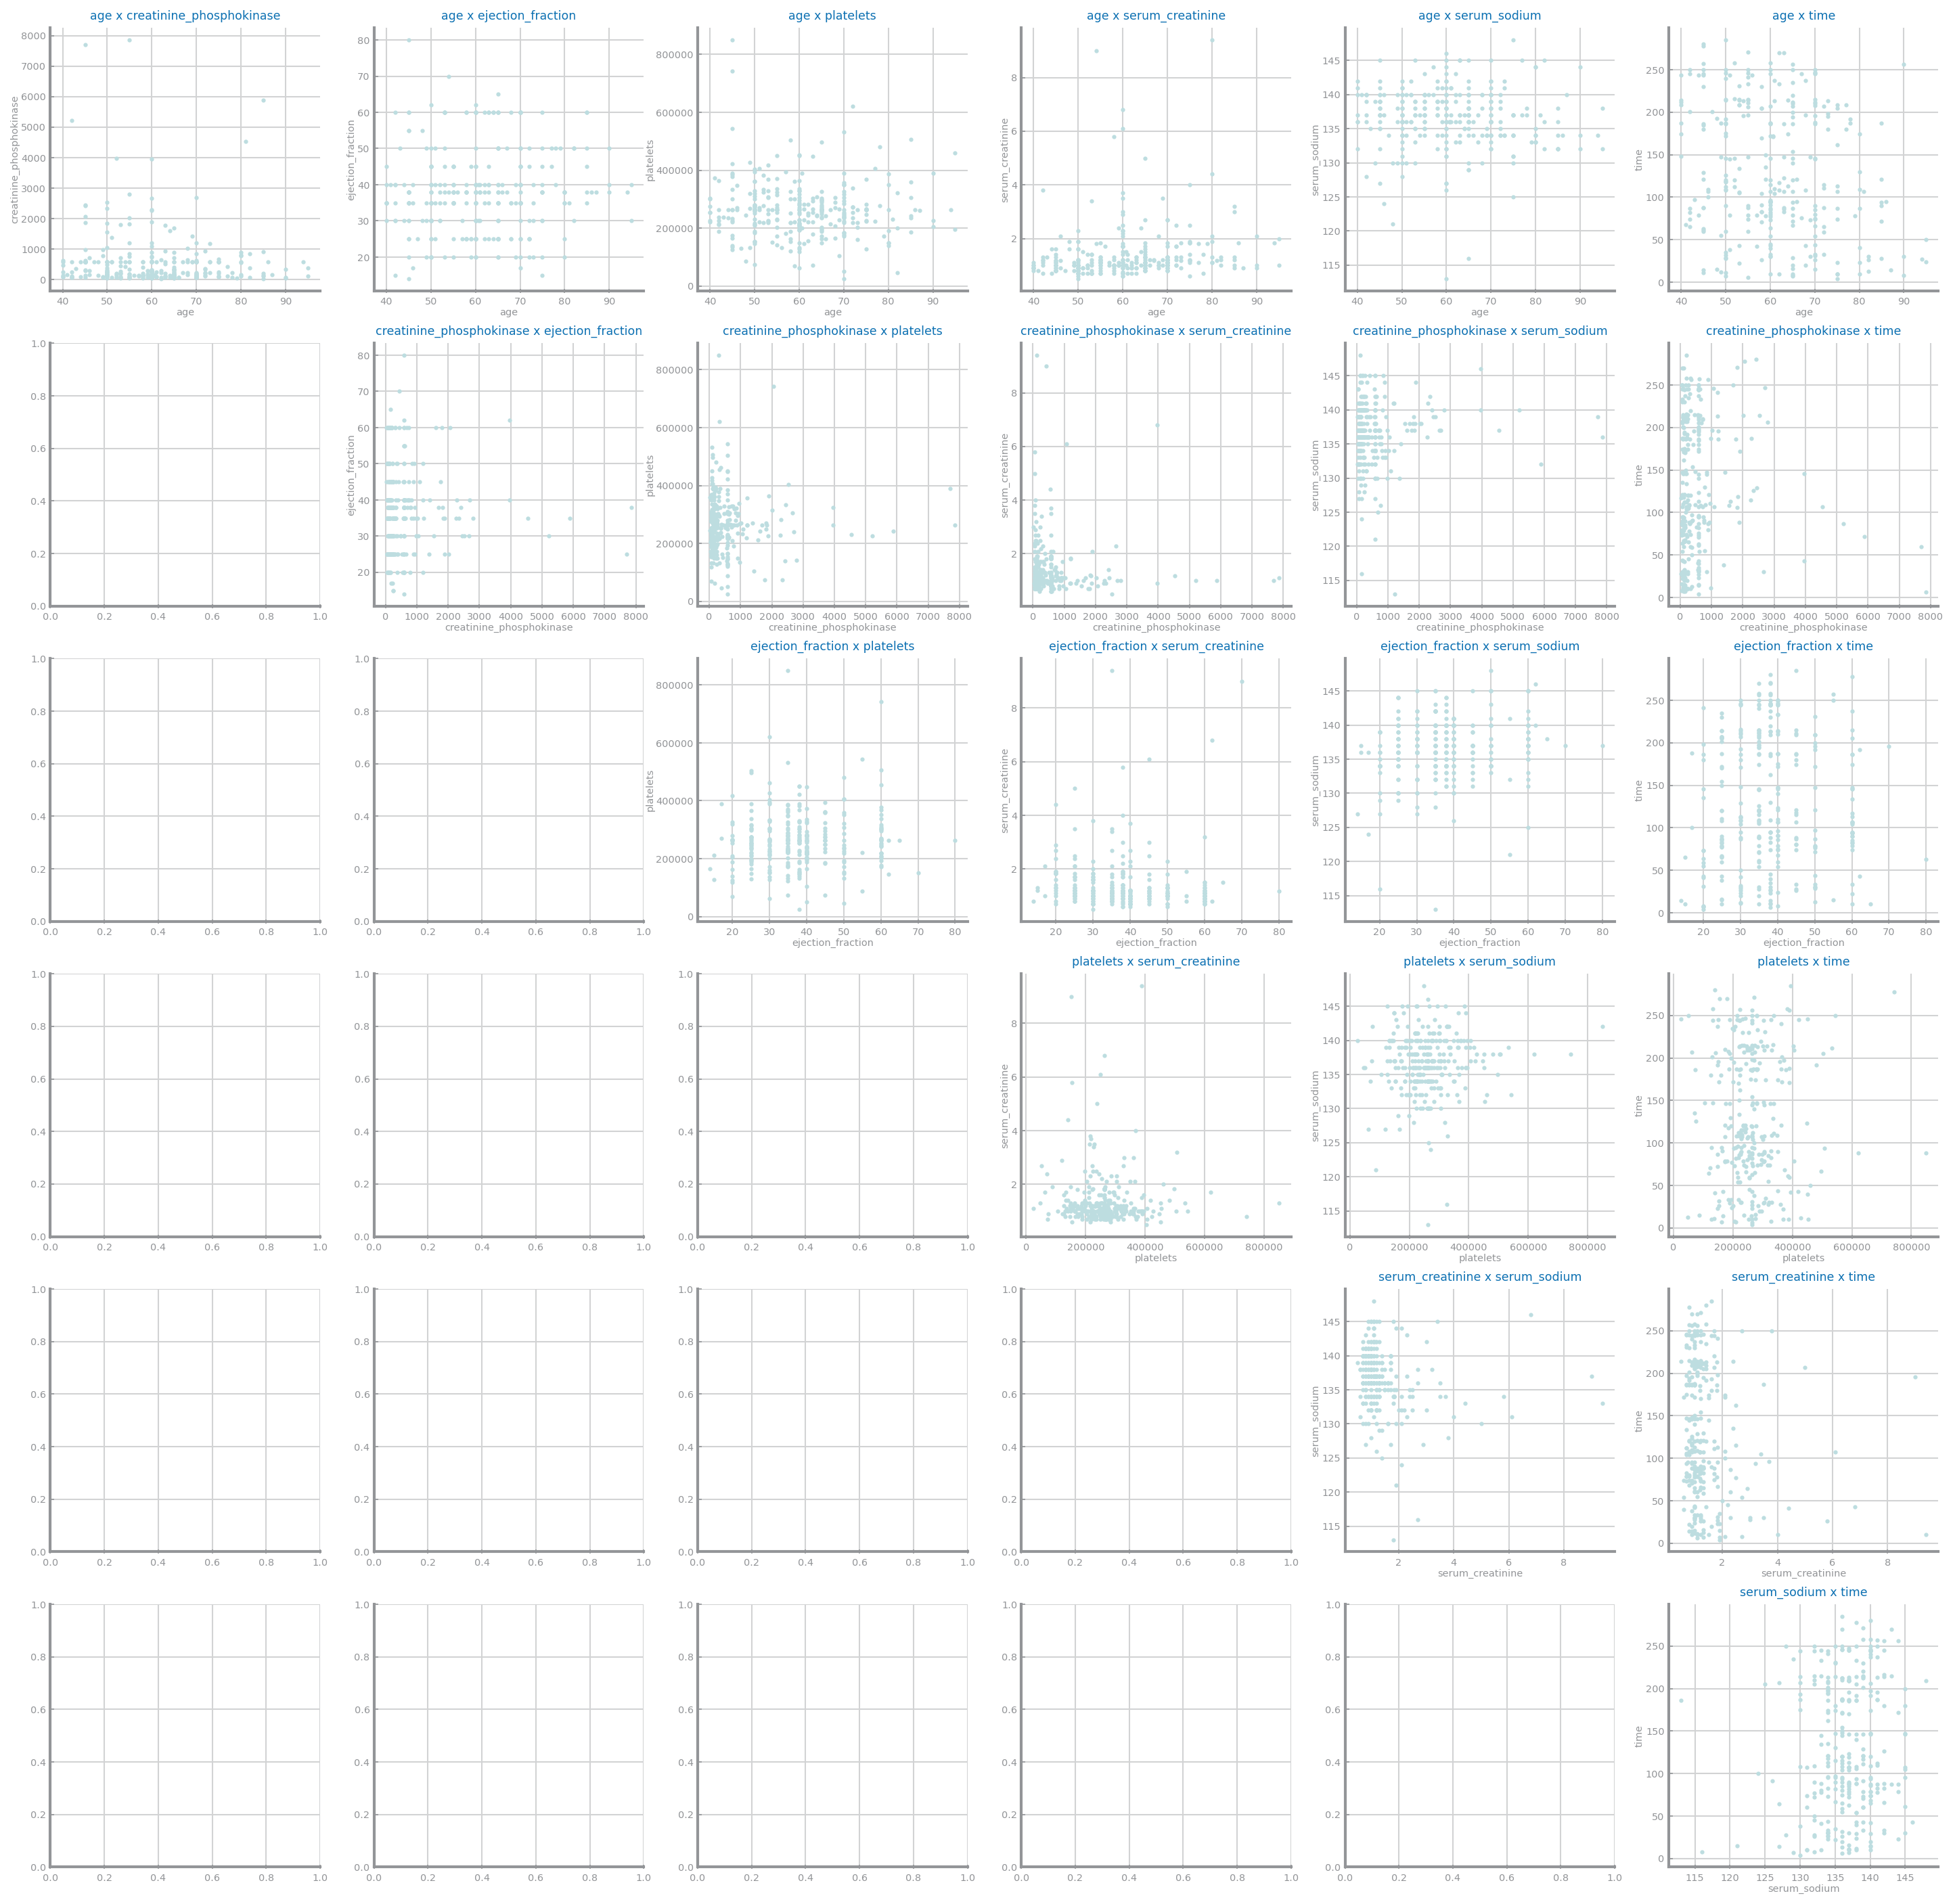

In [16]:
rows, cols = len(variables)-1, len(variables)-1
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
for i in range(len(variables)):
    var1 = variables[i]
    for j in range(i+1, len(variables)):
        var2 = variables[j]
        axs[i, j-1].set_title("%s x %s"%(var1,var2))
        axs[i, j-1].set_xlabel(var1)
        axs[i, j-1].set_ylabel(var2)
        axs[i, j-1].scatter(data[var1], data[var2])
plt.show()


### Correlation analysis

---

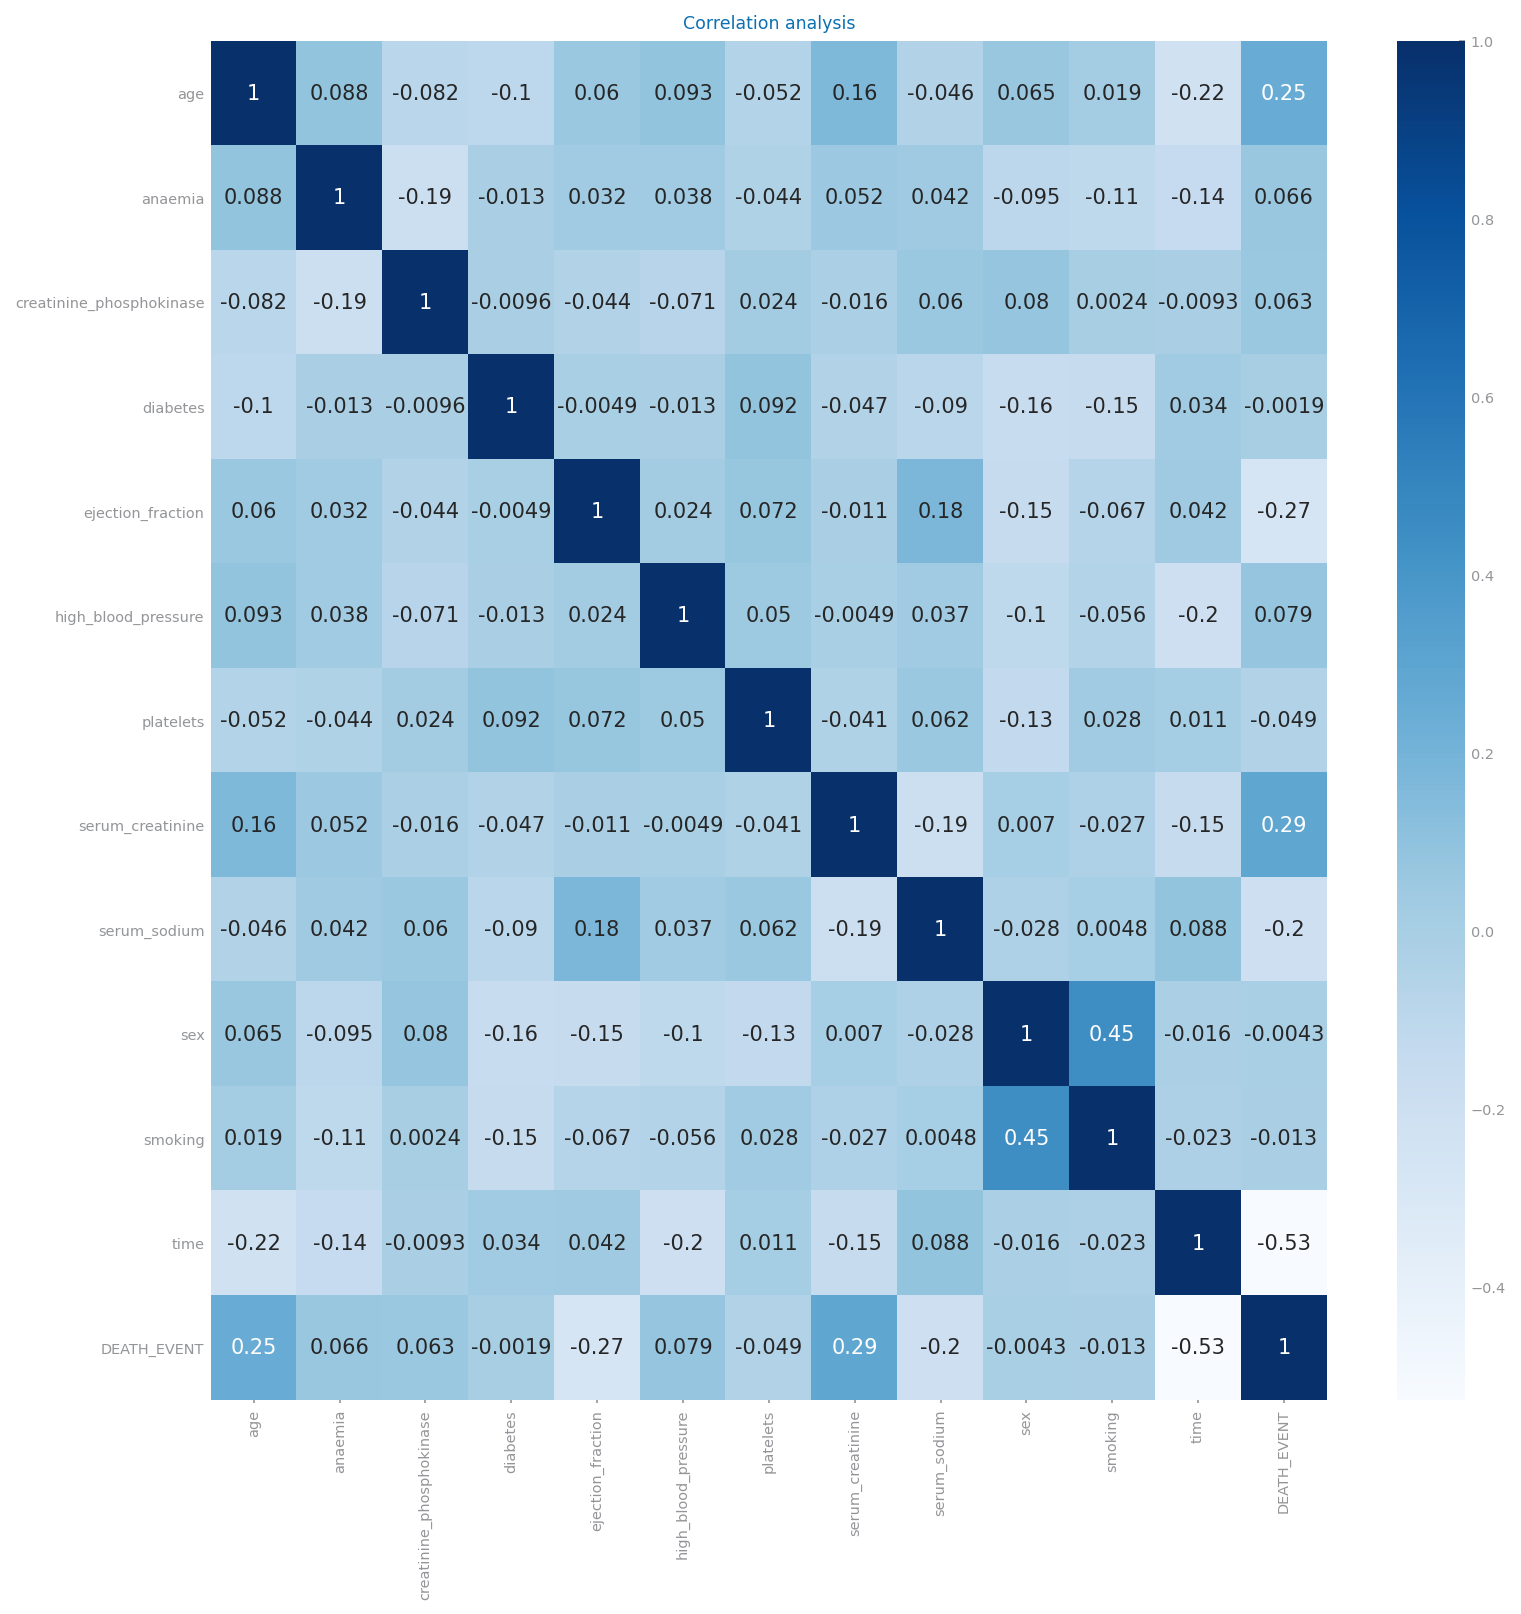

In [17]:
import seaborn as sns

fig = plt.figure(figsize=[12, 12])
corr_mtx = data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

As we can see in the scatterplots, there are a lot of regions in the variables' domain not covered by the data. Also, the correlation between pairs of variables seems to be low in almost all cases.

So, we will try excluding most of the outlier records to see if we can exctract better information from the data.

In [18]:
from scipy import stats 

# Data without most of the outliers
data2 = data[np.abs(data-data.mean()) <= (1.5*data.std())].dropna()

### Sparsity (without outliers)

---

<Figure size 600x450 with 0 Axes>

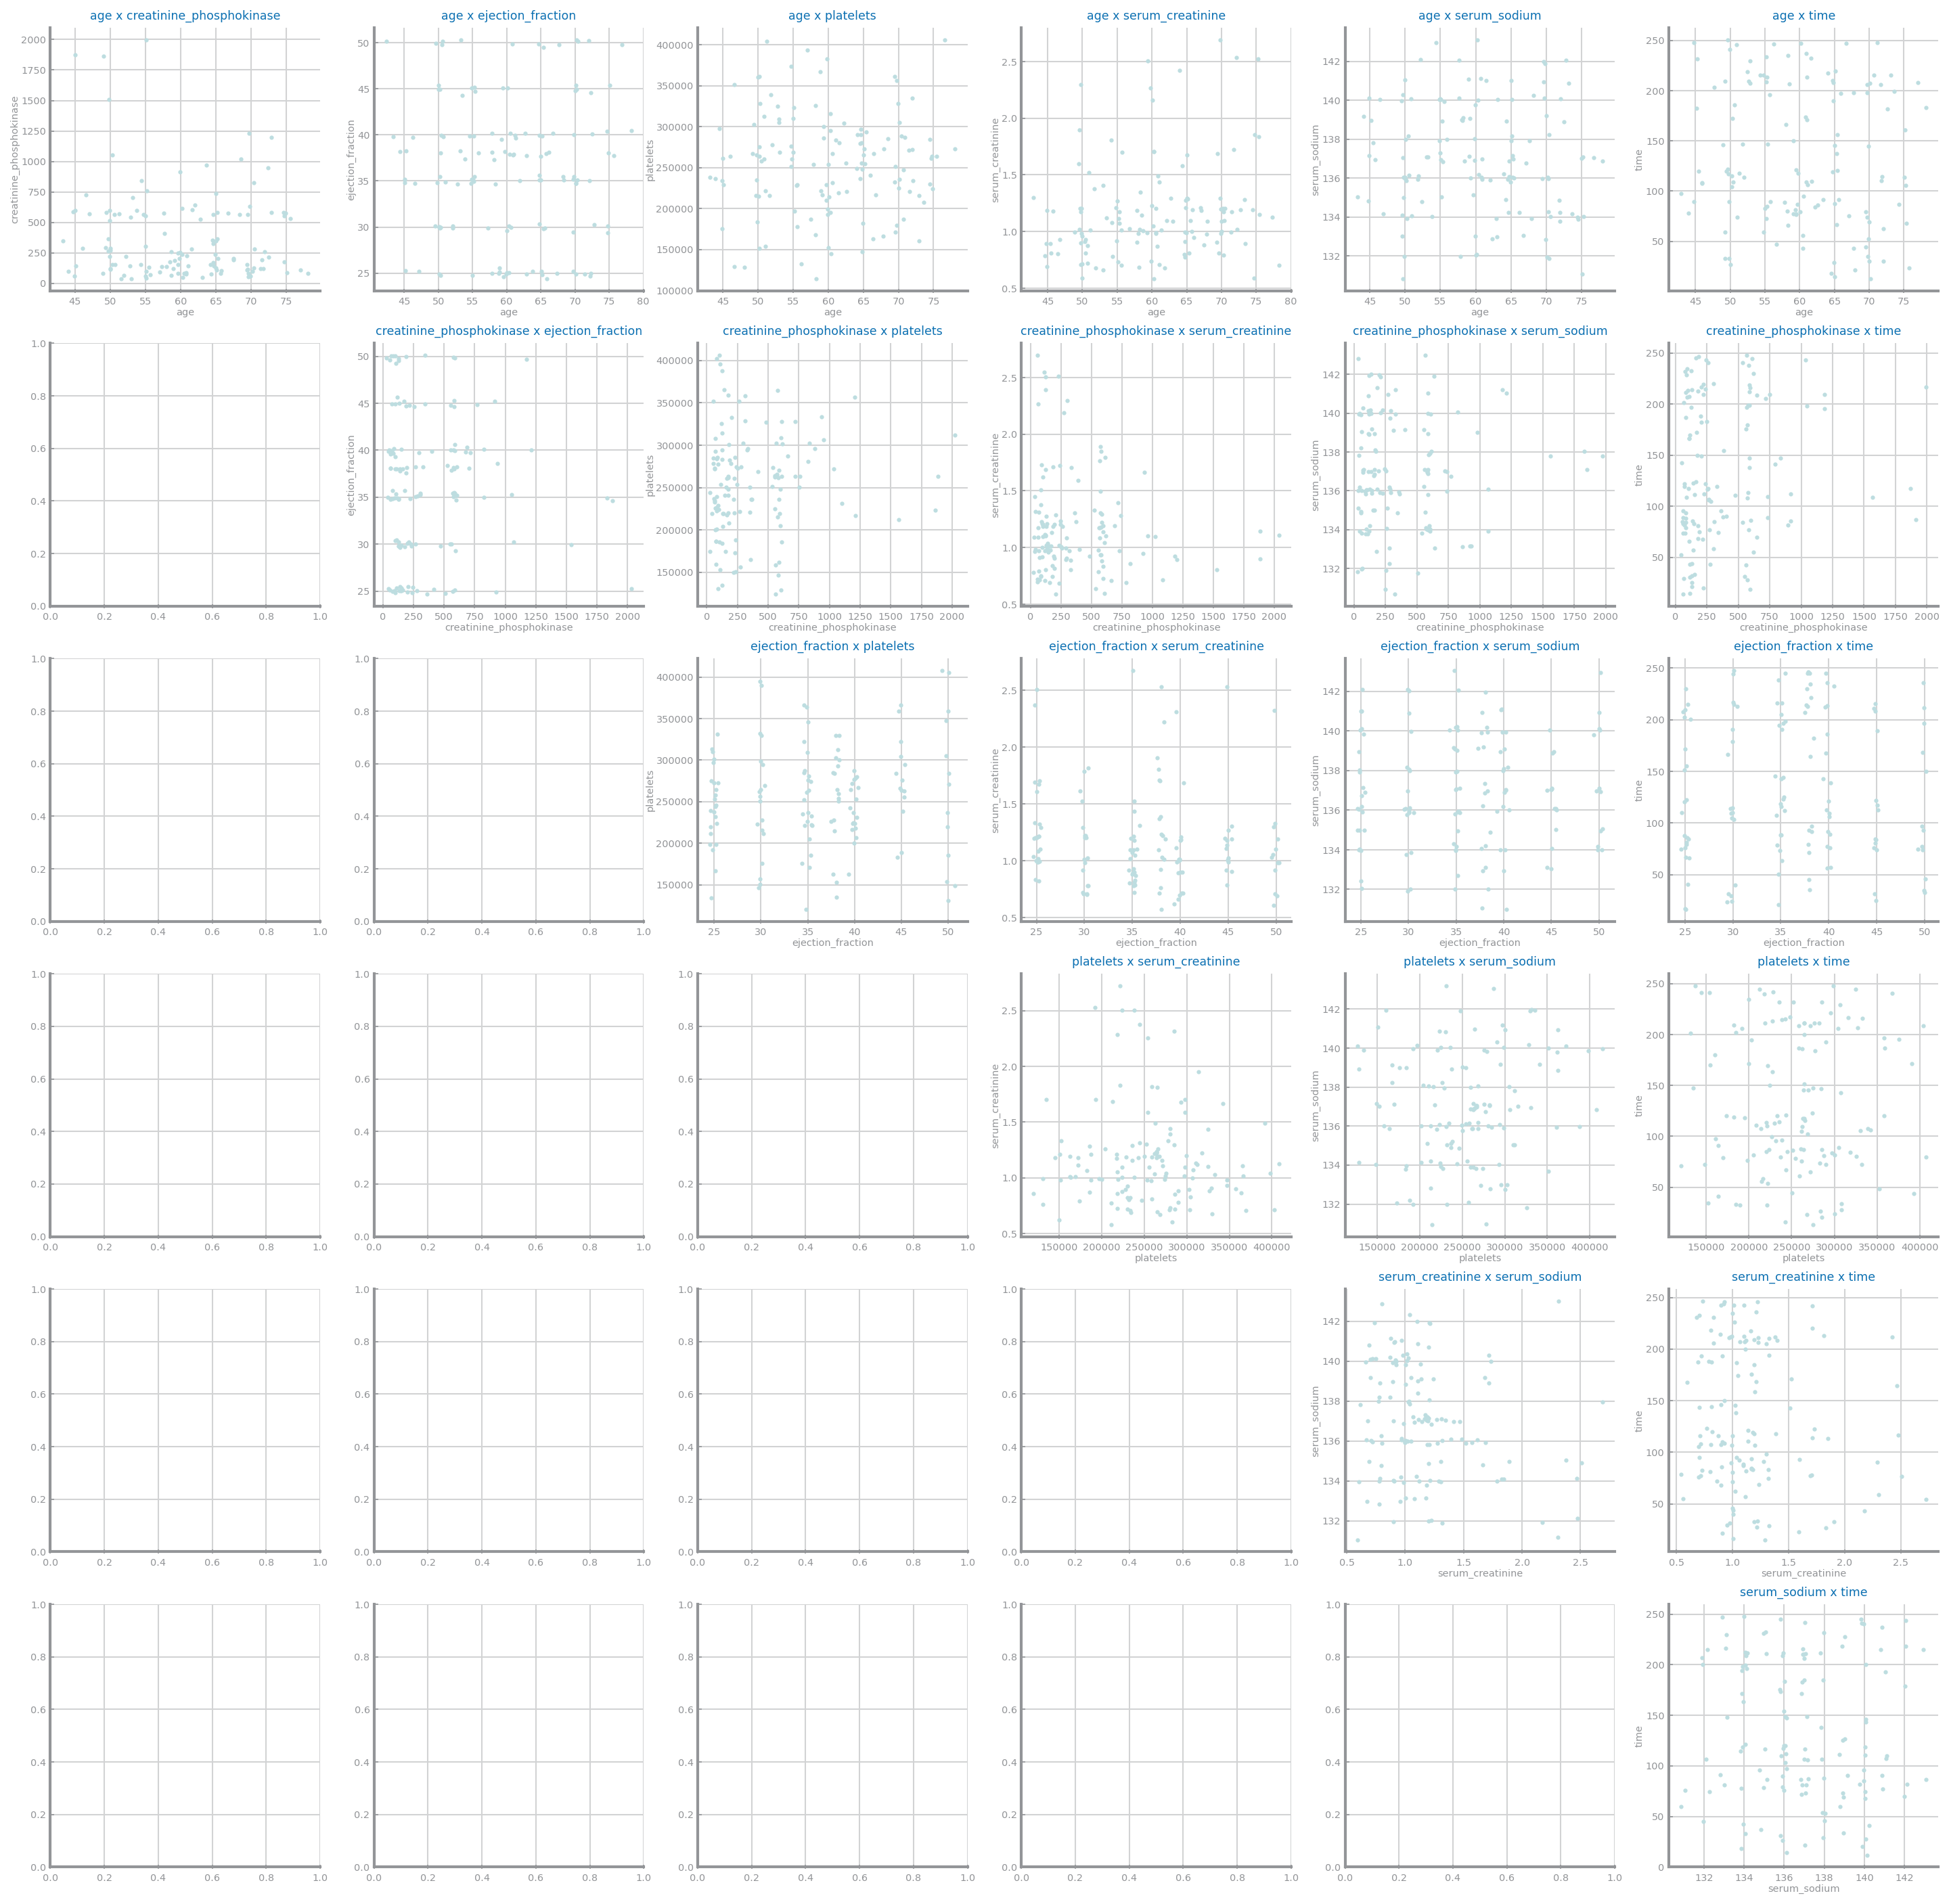

In [19]:
def rand_jitter(arr):
    stdev = .01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

variables2 = data2.select_dtypes(include='number').columns

rows, cols = len(variables2)-1, len(variables2)-1
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=True)
for i in range(len(variables2)):
    var1 = variables2[i]
    for j in range(i+1, len(variables2)):
        var2 = variables2[j]
        axs[i, j-1].set_title("%s x %s"%(var1,var2))
        axs[i, j-1].set_xlabel(var1)
        axs[i, j-1].set_ylabel(var2)
        axs[i, j-1].scatter(rand_jitter(data2[var1]), rand_jitter(data2[var2]))
plt.show()

### Correlation analysis (w/o outliers)

---

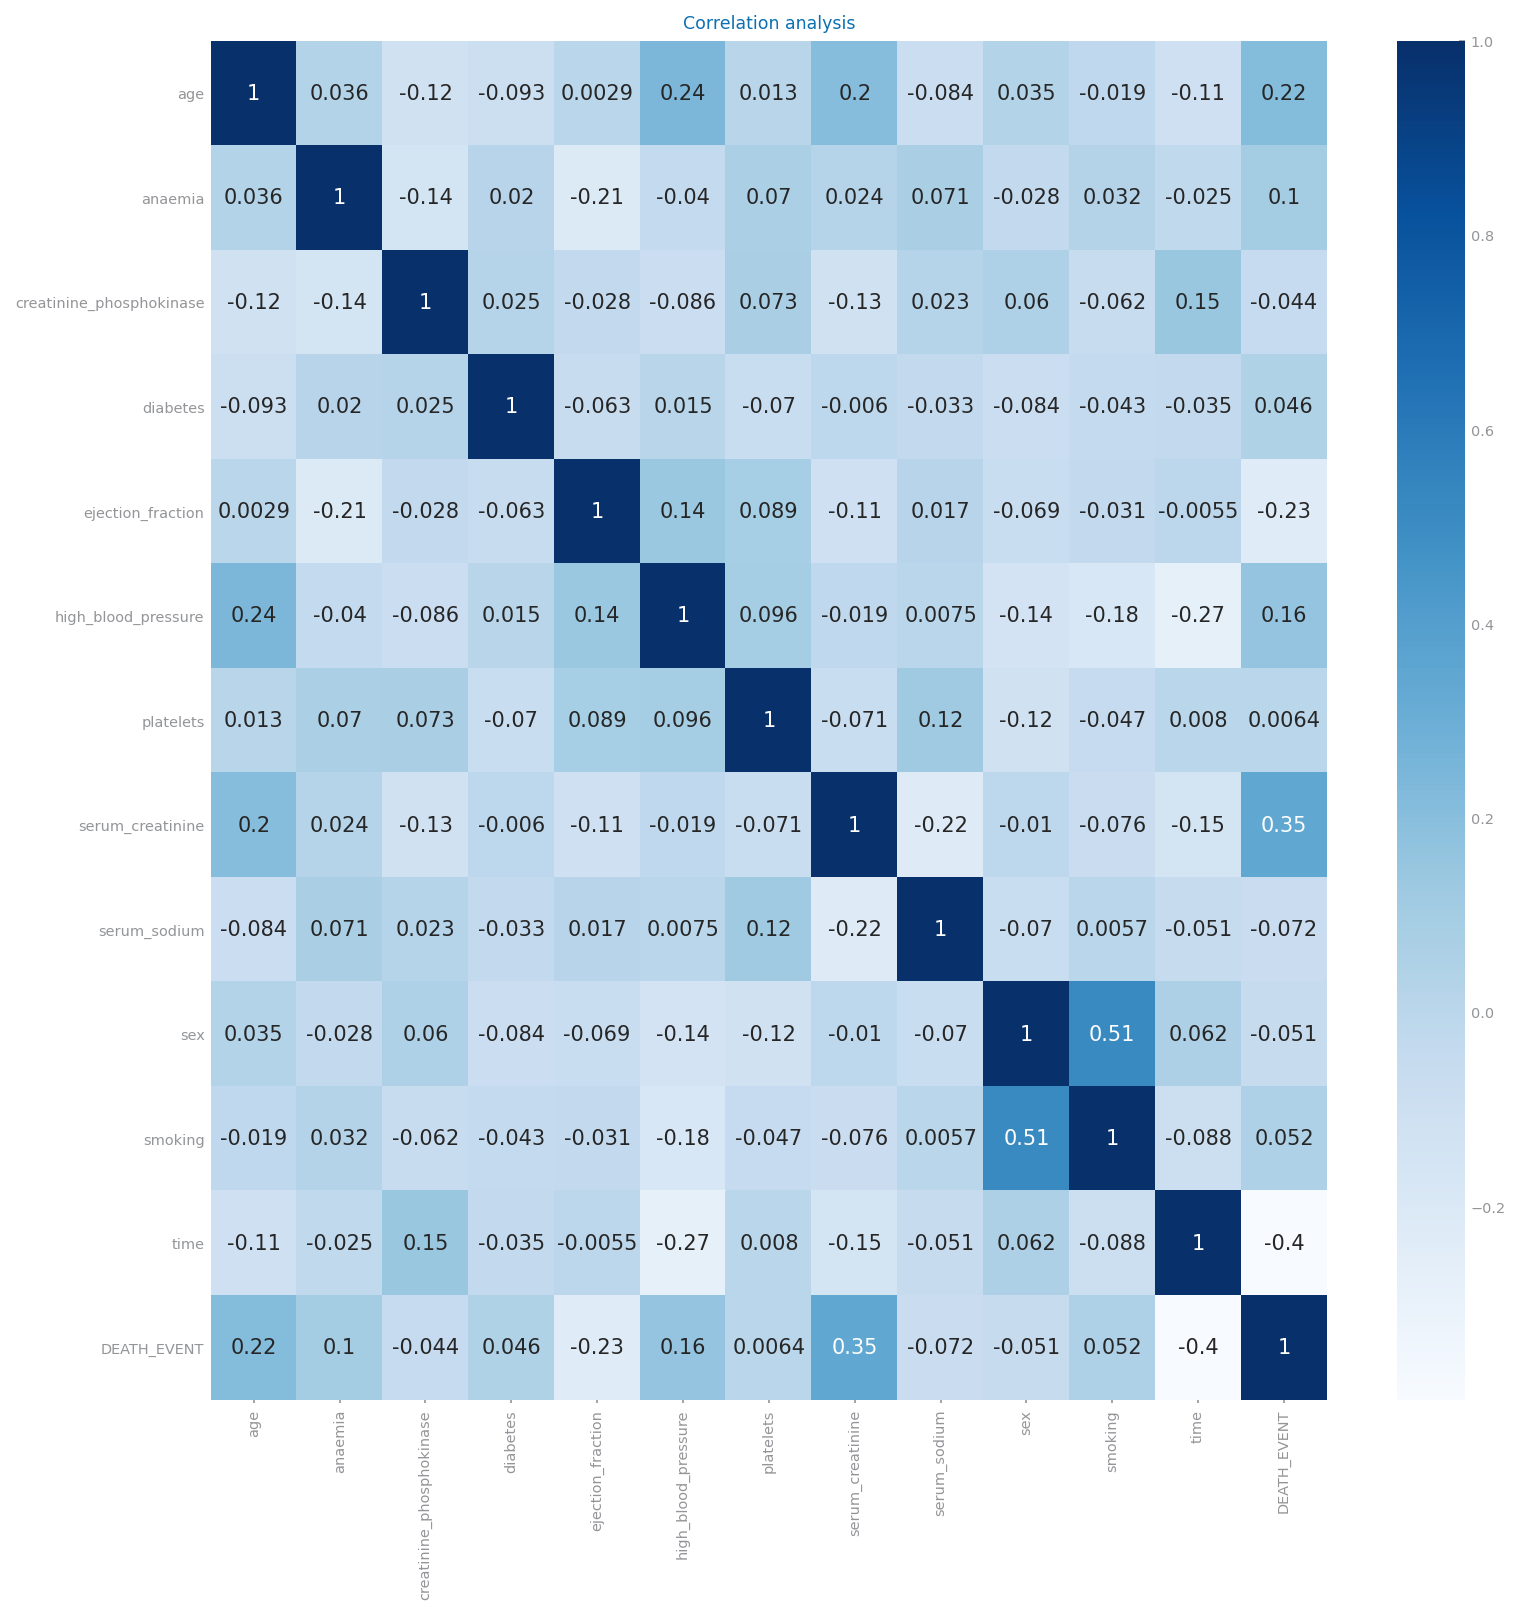

In [20]:
fig = plt.figure(figsize=[12, 12])
corr_mtx = data2.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

As we can see in the scatterplots above, the removal of the outliers eliminated several empty regions in the domain of some variables. Also it slightly increased the correlation between some pairs of variables.

In [21]:
data.to_csv('heart_failure_clinical_records_dataset_after_profiling.csv', sep=';', index=False)
data2.to_csv('heart_failure_clinical_records_dataset_after_profiling_n_o.csv', sep=';', index=False)

### Summary

---

***Is the dataset enough to cover the entire domain?***

We can find, for instance, that there is no record with **"creatinine_phosphokinase"** between 6000 and 7600. But this region is only considered because there are a few outliers with the value of this variable above 7600.

If we consider only the domain (max,min) of the data without the outliers, the data is, for almost all pairs of variables, evenly scattered around the domain, covering most of it. 

We only found that, in the plot **"creatinine_phosphokinase x serum_creatinine"**, the region **[1000,2000] x [2,4]** contains almost no records, although there are many records with **"creatinine_phosphokinase"** in **[1000,2000]**, and with **"serum_creatinine"** in **[2,4]**.
    

***Are there clusters of records?***

**Yes**, but there are few. The most noticeable of them are:

    - in the plot **"creatinine_phosphokinase x platelets"** and range **[0,250] x [150000,300000]**

    - in the plot **"creatinine_phosphokinase x serum_creatinine"** and range **[0,250] x [0.5, 1.5]**

***Is it possible to identify any anomalies?***

**Yes**, we can idenitify several anomalies in the data, even after the removal of the outlier records.

For example:

    - in the plot **"age x creatinine_phosphokinase"**, there are 2 isolated records in the region **[80, 90] x [4000, 6000]** and 2 others in the region **[40, 60] x [7000, 8000]**; after removing the outliers, there are still 4 isolated records in the region **[40, 60] x [1500, 2250]**, among other examples;

    - in the plot **"creatinine_phosphokinase x serum creatinine"**, there is one isolated record next to the point **(x, y) = (4000, 7)**; after removing the outliers, this particular anomaly is removed, although there are still some isolated records.

***Are there dependent variables?***

There are no pairs of variables very highly correlated (coefficient next to 1 or -1). However there are some variables that show some pattern of dependency:

- The pair with the highest correlation coefficient is **(sex, smoking)** (0.45 with outliers and 0.51 without), which confirms the fact that men smoke more often.
- The pair **(time, DEATH_EVENT)** is also relevant (-0.53 with outliers and -0.4 without) which means that patients who are accompanied for a longer time are less likely to die.

We considered that rest of the pairs aren't correlated enough to have a relevant dependency (all have coefficient with absolute value below 0.3 with outliers, and below 0.4 without outliers).